# Data Visualisation

In this tutorial we will visualise the signals in a MIMIC Waveform record.

The **objectives** are:
- To plot one minute of signals from a segment of data
- To look more closely at the shape of the PPG pulse waves

---
## Setup

<div class="alert alert-block alert-warning"> <b>Resource:</b> These steps are taken from the <a href="https://wfdb.io/mimic_wfdb_tutorials/tutorial/notebooks/data-exploration.html">Data Exploration</a> tutorial. </div>

- Specify the required Python packages

In [1]:
import sys
from pathlib import Path

- Specify a particular version of the WFDB toolbox

In [2]:
!pip install wfdb==4.0.0

- Import the WFDB toolbox

In [3]:
import wfdb

- Specify the settings for the MIMIC-IV database

In [4]:
database_name = 'mimic4wdb/0.1.0' # The name of the MIMIC IV Waveform Database on Physionet

- Provide a list of segments which meet the requirements for the study (NB: these are copied from the end of the [Data Exploration Tutorial](https://wfdb.io/mimic_wfdb_tutorials/tutorial/notebooks/data-exploration.html)).

In [49]:
segment_names = ['83404654_0005', '82924339_0007']
segment_dirs = ['mimic4wdb/0.1.0/waves/p100/p10020306/83404654', 'mimic4wdb/0.1.0/waves/p101/p10126957/82924339']

- Specify a segment from which to extract data

In [50]:
rel_segment_no = 1
rel_segment_name = segment_names[rel_segment_no]
rel_segment_dir = segment_dirs[rel_segment_no]
print("Specified segment '{}' in directory '{}'".format(rel_segment_name, rel_segment_dir))

Specified segment '82924339_0007' in directory 'mimic4wdb/0.1.0/waves/p101/p10126957/82924339'


---
## Extract one minute of data from this segment

- Specify the timings of the data to be extracted

In [57]:
start_seconds = 20 # time since the start of the segment at which to begin extracting data
no_seconds_to_load = 60

- Find out the sampling frequency of the waveform data

In [58]:
segment_metadata = wfdb.rdheader(record_name=rel_segment_name, pn_dir=rel_segment_dir) 
print("Metadata loaded from segment: {}".format(rel_segment_name))
fs = round(segment_metadata.fs)

Metadata loaded from segment: 82924339_0007


- Extract the specified data

In [59]:
sampfrom = fs*start_seconds
sampto = fs*(start_seconds+no_seconds_to_load)
segment_data = wfdb.rdrecord(record_name=rel_segment_name, sampfrom=sampfrom, sampto=sampto, pn_dir=rel_segment_dir) 
print("{} seconds of data extracted from: {}".format(no_seconds_to_load, rel_segment_name))

60 seconds of data extracted from: 82924339_0007


---
## Plot the extracted signals

- Plot the extracted signals using the [plot_wfdb](https://wfdb.readthedocs.io/en/latest/plot.html#wfdb.plot.plot_wfdb) function from the WFDB Toolbox.

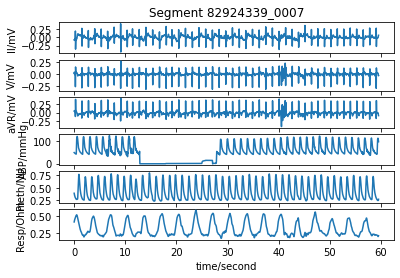

In [60]:
title_text = "Segment " + rel_segment_name
wfdb.plot_wfdb(record=segment_data, title=title_text, time_units='seconds') 

- Extract the PPG signal to loook at it more closely

In [61]:
for sig_no in range(0,len(segment_data.sig_name)):
    if "Pleth" in segment_data.sig_name[sig_no]:
        break
ppg = segment_data.p_signal[:,sig_no]
fs = segment_data.fs
print("Extracted the PPG signal from column {} of the matrix of waveform data.".format(sig_no))

Extracted the PPG signal from column 4 of the matrix of waveform data.


<div class="alert alert-block alert-warning"> <b>Note:</b> the name given to PPG signals in the database is 'Pleth'. </div>

- Plot to look at the shape of the PPG pulse wave more closely

(50.0, 55.0)

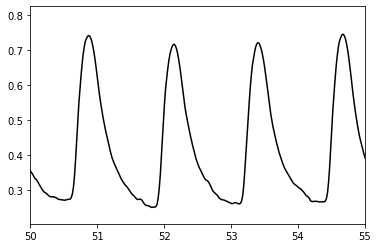

In [62]:
from matplotlib import pyplot as plt
import numpy as np
t = np.arange(0,(len(ppg)/fs),1.0/fs)
plt.plot(t, ppg, color = 'black', label='PPG')
plt.xlim([50, 55])

---
## Compare this to pulse waves from the literature

- Compare the pulse waves above to the different shapes of pulse waves shown here:

![PPG pulse waves](https://upload.wikimedia.org/wikipedia/commons/e/ed/Classes_of_photoplethysmogram_%28PPG%29_pulse_wave_shape.svg)

Source: _Charlton PH et al., 'Assessing hemodynamics from the photoplethysmogram to gain insights into vascular age: a review from VascAgeNet', https://doi.org/10.1152/ajpheart.00392.2021 (CC BY 4.0)_

These pulse waves are the typical shapes for young (class 1) to old (class 4) subjects.

<div class="alert alert-block alert-info"> <b>Question:</b> How do these pulse waves compare to those extracted from the MIMIC Database? Which is most similar? </div>